# Calculating change over time


## imports


In [2]:
import leafmap
import leafmap.colormaps as cm
import requests
import rasterio as rio
from rasterio.merge import merge
import glob

## searching for data


In [3]:
url = "https://earth-search.aws.element84.com/v1/"
collection = "sentinel-2-l2a"
time_range = "2023-08-01/2023-08-31"

In [4]:
# bbox for dallas metro
bbox = [
    -97.06213756027009,
    32.97324551867027,
    -96.46807822577594,
    33.3578329610085,
]

In [5]:
search = leafmap.stac_search(
    url=url,
    max_items=10,
    collections=[collection],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 20}},
    sortby=[{"field": "properties.eo:cloud_cover", "direction": "asc"}],
    get_links=True,
)
search

['https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_14SQB_20230819_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SQB_20230804_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SPC_20230817_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_14SPB_20230819_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SPB_20230814_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SQB_20230814_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_14SPC_20230819_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SQC_20230817_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SPB_20230804_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel

In [6]:
search_gdf = leafmap.stac_search(
    url=url,
    max_items=10,
    collections=[collection],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 20}},
    sortby=[{"field": "properties.eo:cloud_cover", "direction": "asc"}],
    get_gdf=True,
)

In [7]:
search_gdf.columns

Index(['geometry', 'created', 'platform', 'constellation', 'instruments',
       'eo:cloud_cover', 'proj:epsg', 'mgrs:utm_zone', 'mgrs:latitude_band',
       'mgrs:grid_square', 'grid:code', 'view:sun_azimuth',
       'view:sun_elevation', 's2:degraded_msi_data_percentage',
       's2:nodata_pixel_percentage', 's2:saturated_defective_pixel_percentage',
       's2:dark_features_percentage', 's2:cloud_shadow_percentage',
       's2:vegetation_percentage', 's2:not_vegetated_percentage',
       's2:water_percentage', 's2:unclassified_percentage',
       's2:medium_proba_clouds_percentage', 's2:high_proba_clouds_percentage',
       's2:thin_cirrus_percentage', 's2:snow_ice_percentage',
       's2:product_type', 's2:processing_baseline', 's2:product_uri',
       's2:generation_time', 's2:datatake_id', 's2:datatake_type',
       's2:datastrip_id', 's2:granule_id', 's2:reflectance_conversion_factor',
       'datetime', 's2:sequence', 'earthsearch:s3_path',
       'earthsearch:payload_id', 'ear

## exploring and filtering search results


<Axes: >

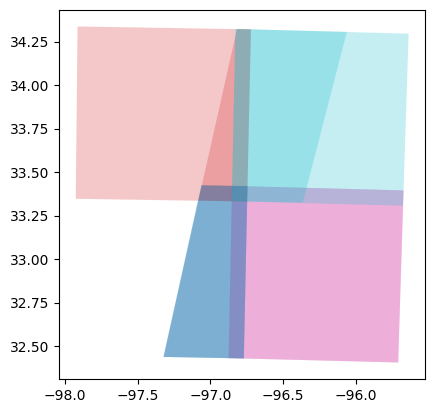

In [8]:
search_gdf.plot("mgrs:grid_square", alpha=0.25)

In [9]:
search_gdf["s2:granule_id"].value_counts()

s2:granule_id
S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A033700_T14SQB_N05.09    1
S2A_OPER_MSI_L2A_TL_2APS_20230804T235402_A042394_T14SQB_N05.09    1
S2A_OPER_MSI_L2A_TL_2APS_20230818T002256_A042580_T14SPC_N05.09    1
S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A033700_T14SPB_N05.09    1
S2A_OPER_MSI_L2A_TL_2APS_20230815T002553_A042537_T14SPB_N05.09    1
S2A_OPER_MSI_L2A_TL_2APS_20230815T002553_A042537_T14SQB_N05.09    1
S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A033700_T14SPC_N05.09    1
S2A_OPER_MSI_L2A_TL_2APS_20230818T002256_A042580_T14SQC_N05.09    1
S2A_OPER_MSI_L2A_TL_2APS_20230804T235402_A042394_T14SPB_N05.09    1
S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A033700_T14SQC_N05.09    1
Name: count, dtype: int64

In [10]:
search_gdf["area"] = search_gdf.geometry.area

In [11]:
search_gdf.sort_values("area", ascending=False, inplace=True)

In [12]:
search_gdf

geometry  \
2  POLYGON ((-97.91284 34.33683, -97.92531 33.346...   
9  POLYGON ((-96.81576 34.32217, -96.82780 34.277...   
0  POLYGON ((-96.84938 33.42092, -96.87321 32.431...   
1  POLYGON ((-96.84938 33.42092, -96.87321 32.431...   
5  POLYGON ((-96.84938 33.42092, -96.87321 32.431...   
7  POLYGON ((-96.82664 34.32236, -96.85153 33.333...   
4  POLYGON ((-97.06177 33.42442, -97.32332 32.437...   
8  POLYGON ((-97.05919 33.42438, -97.32056 32.437...   
3  POLYGON ((-97.05790 33.42436, -97.31949 32.437...   
6  POLYGON ((-96.81576 34.32217, -97.08134 33.336...   

                    created     platform constellation instruments  \
2  2023-08-18T06:10:25.042Z  sentinel-2a    sentinel-2       [msi]   
9  2023-08-20T04:44:38.807Z  sentinel-2b    sentinel-2       [msi]   
0  2023-08-20T04:40:37.325Z  sentinel-2b    sentinel-2       [msi]   
1  2023-08-05T04:59:04.872Z  sentinel-2a    sentinel-2       [msi]   
5  2023-08-15T04:10:46.325Z  sentinel-2a    sentinel-2       [msi]   
7  2023-08-18T06:09:55.100Z  sentinel-2a    sentinel-2       [msi]   
4  2023-08-15T04:07:22.379Z  sentinel-2a    sentinel-2       [msi]   
8  2023-08-05T04:52:48.750Z  sentinel-2a    sentinel-2       [msi]   
3  2023-08-20T04:36:25.463Z  sentinel-2b    sentinel-2       [msi]   
6  2023-08-20T04:30:59.255Z  sentinel-2b    sentinel-2       [msi]   

   eo:cloud_cover  proj:epsg  mgrs:utm_zone mgrs:latitude_band  \
2        0.006437      32614             14                  S   
9        0.076934      32614             14                  S   
0        0.004539      32614             14                  S   
1        0.005262      32614             14                  S   
5        0.014575      32614             14                  S   
7        0.040440      32614             14                  S   
4        0.014211      32614             14                  S   
8        0.059570      32614             14                  S   
3        0.009056      32614             14                  S   
6        0.017386      32614             14                  S   

  mgrs:grid_square  ...                                      s2:granule_id  \
2               PC  ...  S2A_OPER_MSI_L2A_TL_2APS_20230818T002256_A0425...   
9               QC  ...  S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A0337...   
0               QB  ...  S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A0337...   
1               QB  ...  S2A_OPER_MSI_L2A_TL_2APS_20230804T235402_A0423...   
5               QB  ...  S2A_OPER_MSI_L2A_TL_2APS_20230815T002553_A0425...   
7               QC  ...  S2A_OPER_MSI_L2A_TL_2APS_20230818T002256_A0425...   
4               PB  ...  S2A_OPER_MSI_L2A_TL_2APS_20230815T002553_A0425...   
8               PB  ...  S2A_OPER_MSI_L2A_TL_2APS_20230804T235402_A0423...   
3               PB  ...  S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A0337...   
6               PC  ...  S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A0337...   

   s2:reflectance_conversion_factor                     datetime  s2:sequence  \
2                          0.974489  2023-08-17T17:24:31.907000Z            0   
9                          0.975198  2023-08-19T17:14:31.780000Z            0   
0                          0.975198  2023-08-19T17:14:46.266000Z            0   
1                          0.970632  2023-08-04T17:14:46.231000Z            0   
5                          0.973476  2023-08-14T17:14:46.612000Z            0   
7                          0.974489  2023-08-17T17:24:28.416000Z            0   
4                          0.973476  2023-08-14T17:14:49.390000Z            0   
8                          0.970632  2023-08-04T17:14:49.014000Z            0   
3                          0.975198  2023-08-19T17:14:49.046000Z            0   
6                          0.975198  2023-08-19T17:14:35.561000Z            0   

                                 earthsearch:s3_path  \
2  s3://sentinel-cogs/sentinel-s2-l2a-cogs/14/S/P...   
9  s3://sentinel-cogs/sentinel-s2-l2a-cogs/14/S/Q...   
0  s3://se

In [13]:
search_gdf.drop_duplicates("mgrs:grid_square", inplace=True)

<Axes: >

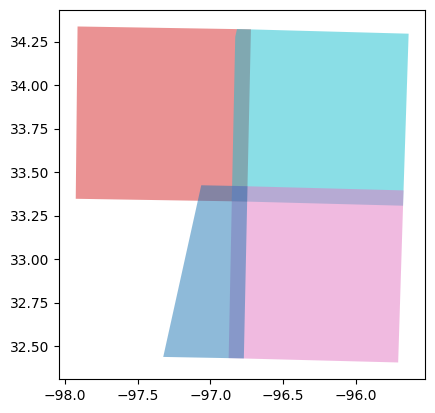

In [14]:
search_gdf.iloc[0:4].plot("s2:granule_id", alpha=0.5)

In [15]:
# # create a query searching for unique datastrip ids based on the above
q = {"s2:granule_id": {"in": search_gdf["s2:granule_id"].iloc[0:4].unique().tolist()}}

search_gdf2 = leafmap.stac_search(
    url=url,
    max_items=4,
    collections=[collection],
    bbox=bbox,
    datetime=time_range,
    query=q,
    get_gdf=True,
)

In [16]:
search_gdf2

geometry  \
0  POLYGON ((-96.84938 33.42092, -96.87321 32.431...   
1  POLYGON ((-96.81576 34.32217, -96.82780 34.277...   
2  POLYGON ((-97.91284 34.33683, -97.92531 33.346...   
3  POLYGON ((-97.06177 33.42442, -97.32332 32.437...   

                    created     platform constellation instruments  \
0  2023-08-20T04:40:37.325Z  sentinel-2b    sentinel-2       [msi]   
1  2023-08-20T04:44:38.807Z  sentinel-2b    sentinel-2       [msi]   
2  2023-08-18T06:10:25.042Z  sentinel-2a    sentinel-2       [msi]   
3  2023-08-15T04:07:22.379Z  sentinel-2a    sentinel-2       [msi]   

   eo:cloud_cover  proj:epsg  mgrs:utm_zone mgrs:latitude_band  \
0        0.004539      32614             14                  S   
1        0.076934      32614             14                  S   
2        0.006437      32614             14                  S   
3        0.014211      32614             14                  S   

  mgrs:grid_square  ...                                    s2:datastrip_id  \
0               QB  ...  S2B_OPER_MSI_L2A_DS_2BPS_20230819T223356_S2023...   
1               QC  ...  S2B_OPER_MSI_L2A_DS_2BPS_20230819T223356_S2023...   
2               PC  ...  S2A_OPER_MSI_L2A_DS_2APS_20230818T002256_S2023...   
3               PB  ...  S2A_OPER_MSI_L2A_DS_2APS_20230815T002553_S2023...   

                                       s2:granule_id  \
0  S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A0337...   
1  S2B_OPER_MSI_L2A_TL_2BPS_20230819T223356_A0337...   
2  S2A_OPER_MSI_L2A_TL_2APS_20230818T002256_A0425...   
3  S2A_OPER_MSI_L2A_TL_2APS_20230815T002553_A0425...   

   s2:reflectance_conversion_factor                     datetime  s2:sequence  \
0                          0.975198  2023-08-19T17:14:46.266000Z            0   
1                          0.975198  2023-08-19T17:14:31.780000Z            0   
2                          0.974489  2023-08-17T17:24:31.907000Z            0   
3                          0.973476  2023-08-14T17:14:49.390000Z            0   

                                 earthsearch:s3_path  \
0  s3://sentinel-cogs/sentinel-s2-l2a-cogs/14/S/Q...   
1  s3://sentinel-cogs/sentinel-s2-l2a-cogs/14/S/Q...   
2  s3://sentinel-cogs/sentinel-s2-l2a-cogs/14/S/P...   
3  s3://sentinel-cogs/sentinel-s2-l2a-cogs/14/S/P...   

                              earthsearch:payload_id  \
0  roda-sentinel2/workflow-sentinel2-to-stac/a707...   
1  roda-sentinel2/workflow-sentinel2-to-stac/2524...   
2  roda-sentinel2/workflow-sentinel2-to-stac/a898...   
3  roda-sentinel2/workflow-sentinel2-to-stac/ccee...   

   earthsearch:boa_offset_applied             processing:software  \
0                            True  {'sentinel2-to-stac': '0.1.1'}   
1                            True  {'sentinel2-to-stac': '0.1.1'}   
2                            True  {'sentinel2-to-stac': '0.1.1'}   
3                            True  {'sentinel2-to-stac': '0.1.1'}   

                    updated  
0  2023-08-20T04:40:37.325Z  
1  2023-08-20T04:44:38.807Z  
2  2023-08-18T06:10:25.042Z  
3  2023-08-15T04:07:22.379Z  

[4 rows x 42 columns]

<Axes: >

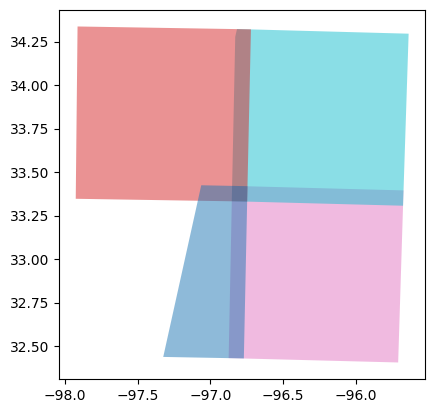

In [17]:
search_gdf2.plot("mgrs:grid_square", alpha=0.5)

In [18]:
search

['https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_14SQB_20230819_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SQB_20230804_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SPC_20230817_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_14SPB_20230819_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SPB_20230814_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SQB_20230814_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_14SPC_20230819_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SQC_20230817_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SPB_20230804_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel

In [19]:
search_gdf2 = leafmap.stac_search(
    url=url,
    max_items=4,
    collections=[collection],
    bbox=bbox,
    datetime=time_range,
    query=q,
    get_links=True,
)

In [20]:
search_gdf2

['https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_14SQB_20230819_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2B_14SQC_20230819_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SPC_20230817_0_L2A',
 'https://earth-search.aws.element84.com/v1/collections/sentinel-2-l2a/items/S2A_14SPB_20230814_0_L2A']

### plot to accentuate paved and non-paved divide


In [21]:
m = leafmap.Map()

for layer in search_gdf2:
    m.add_stac_layer(layer, bands=["nir", "red", "green"], name=layer.split("/")[-1])
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

### download files for analysis


In [22]:
def get_raster_band_urls(item: str, bands: list | None = None):
    available_bands = leafmap.stac_bands(item)
    stac = requests.get(item).json()
    band_urls = {
        x: stac["assets"][x]["href"]
        for x in available_bands
        if stac["assets"][x]["href"].startswith("http")
    }

    # if bands, only return bands in list
    if bands:
        band_urls = {x: band_urls[x] for x in bands if x in band_urls}

    return band_urls


def download_stac_layers(layers, out_dir, bands=None):
    for layer in layers:
        band_urls = get_raster_band_urls(layer, bands)
        for band, url in band_urls.items():
            print(url)
            out_file = f"{out_dir}/{layer.split('/')[-1]}_{band}.tif"
            leafmap.download_file(url, out_file, overwrite=False)


def get_stac_crs(item):
    stac = requests.get(item).json()
    return stac["properties"]["proj:epsg"]

In [23]:
stac_crs = get_stac_crs(search_gdf2[0])

In [24]:
stac_crs

32614

In [25]:
download_stac_layers(
    search_gdf2,
    "../Data/stac/dallas",
    bands=[
        "nir",
        "red",
        "green",
        "blue",
    ],  # add heat? others?
)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/14/S/QB/2023/8/S2B_14SQB_20230819_0_L2A/B08.tif
../Data/stac/dallas/S2B_14SQB_20230819_0_L2A_nir.tif already exists. Skip downloading. Set overwrite=True to overwrite.
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/14/S/QB/2023/8/S2B_14SQB_20230819_0_L2A/B04.tif
../Data/stac/dallas/S2B_14SQB_20230819_0_L2A_red.tif already exists. Skip downloading. Set overwrite=True to overwrite.
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/14/S/QB/2023/8/S2B_14SQB_20230819_0_L2A/B03.tif
../Data/stac/dallas/S2B_14SQB_20230819_0_L2A_green.tif already exists. Skip downloading. Set overwrite=True to overwrite.
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/14/S/QB/2023/8/S2B_14SQB_20230819_0_L2A/B02.tif
../Data/stac/dallas/S2B_14SQB_20230819_0_L2A_blue.tif already exists. Skip downloading. Set overwrite=True to overwrite.
https://sentinel-cogs.s3.us-west-2.amazonaws.

In [26]:
download_stac_layers(
    search_gdf2,
    "../Data/stac/dallas",
)

https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/14/S/QB/2023/8/S2B_14SQB_20230819_0_L2A/AOT.tif
../Data/stac/dallas/S2B_14SQB_20230819_0_L2A_aot.tif already exists. Skip downloading. Set overwrite=True to overwrite.
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/14/S/QB/2023/8/S2B_14SQB_20230819_0_L2A/B02.tif
../Data/stac/dallas/S2B_14SQB_20230819_0_L2A_blue.tif already exists. Skip downloading. Set overwrite=True to overwrite.
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/14/S/QB/2023/8/S2B_14SQB_20230819_0_L2A/B01.tif
../Data/stac/dallas/S2B_14SQB_20230819_0_L2A_coastal.tif already exists. Skip downloading. Set overwrite=True to overwrite.
https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/14/S/QB/2023/8/S2B_14SQB_20230819_0_L2A/B03.tif
../Data/stac/dallas/S2B_14SQB_20230819_0_L2A_green.tif already exists. Skip downloading. Set overwrite=True to overwrite.
https://sentinel-cogs.s3.us-west-2.amazon

In [27]:
# mosaic files based on band name


def mosaic_by_band(
    dir,
    bands: list = [
        "red",
        "blue",
        "green",
        "nir",
        "coastal",
        "nir08",
        "nir09",
        "rededge1",
        "rededge2",
        "rededge3",
        "scl",
        "swir16",
        "swir22",
    ],
    crs: str = None,
):
    mosaics = {}
    for band in bands:
        files = glob.glob(f"{dir}/*{band}.tif")

        out_file = f"{dir}/mosaic_{band}_.tif"
        raster_data = [rio.open(f) for f in files]

        mosaic, out_trans = merge(raster_data)
        out_meta = raster_data[0].meta.copy()
        out_meta.update(
            {
                "driver": "GTiff",
                "height": mosaic.shape[1],
                "width": mosaic.shape[2],
                "transform": out_trans,
                "crs": f"epsg:{crs}",
            }
        )

        with rio.open(out_file, "w", **out_meta) as dest:
            dest.write(mosaic)

        mosaics[band] = out_file

    return mosaics

In [28]:
mosaic_bands = mosaic_by_band(
    "../Data/stac/dallas", ["nir", "red", "green", "blue"], stac_crs
)

In [29]:
mosaic_bands_all = mosaic_by_band("../Data/stac/dallas", crs=stac_crs)

KeyboardInterrupt: 

In [ ]:
mosaic_bands_all

{'red': '../Data/stac/dallas/mosaic_red_.tif',
 'blue': '../Data/stac/dallas/mosaic_blue_.tif',
 'green': '../Data/stac/dallas/mosaic_green_.tif',
 'nir': '../Data/stac/dallas/mosaic_nir_.tif',
 'coastal': '../Data/stac/dallas/mosaic_coastal_.tif',
 'nir08': '../Data/stac/dallas/mosaic_nir08_.tif',
 'nir09': '../Data/stac/dallas/mosaic_nir09_.tif',
 'rededge1': '../Data/stac/dallas/mosaic_rededge1_.tif',
 'rededge2': '../Data/stac/dallas/mosaic_rededge2_.tif',
 'rededge3': '../Data/stac/dallas/mosaic_rededge3_.tif',
 'scl': '../Data/stac/dallas/mosaic_scl_.tif',
 'swir16': '../Data/stac/dallas/mosaic_swir16_.tif',
 'swir22': '../Data/stac/dallas/mosaic_swir22_.tif'}

In [ ]:
# load, calculate ndvi, visualize ndvi
# segment based on visual spectrum, classify
# repeat whole process for past image (in a more programmatic way)
# diff the two to see what change has occurred

In [ ]:
nir = rio.open(mosaic_bands["nir"]).read(1).astype("float32")
red = rio.open(mosaic_bands["red"]).read(1).astype("float32")

### calculate NDVI


In [ ]:
ndvi = (nir - red) / (nir + red)

In [ ]:
import numpy as np

In [ ]:
# fill nan with -2, outside of the range but not so far outside
ndvi[np.isnan(ndvi)] = -1.1

In [ ]:
ndvi

array([[ 0.32408434,  0.29939127,  0.29359823, ...,  0.73136204,
         0.7670886 ,  0.78903455],
       [ 0.30212304,  0.2733051 ,  0.2877433 , ...,  0.76618594,
         0.78105634,  0.79848444],
       [ 0.3       ,  0.26897264,  0.30549684, ...,  0.7636706 ,
         0.79545456,  0.79603904],
       ...,
       [-1.1       , -1.1       , -1.1       , ...,  0.28807947,
         0.2891073 ,  0.29392514],
       [-1.1       , -1.1       , -1.1       , ...,  0.29233292,
         0.2876599 ,  0.28513405],
       [-1.1       , -1.1       , -1.1       , ...,  0.31071576,
         0.28517744,  0.31913063]], dtype=float32)

In [ ]:
ndvi_mult = ndvi * 10

In [ ]:
ndvi_mult

array([[  3.2408433,   2.9939127,   2.9359822, ...,   7.3136206,
          7.670886 ,   7.8903456],
       [  3.0212305,   2.7330508,   2.877433 , ...,   7.6618595,
          7.8105636,   7.984844 ],
       [  3.       ,   2.6897264,   3.0549684, ...,   7.6367064,
          7.9545455,   7.9603906],
       ...,
       [-11.       , -11.       , -11.       , ...,   2.8807948,
          2.891073 ,   2.9392514],
       [-11.       , -11.       , -11.       , ...,   2.923329 ,
          2.876599 ,   2.8513405],
       [-11.       , -11.       , -11.       , ...,   3.1071577,
          2.8517745,   3.1913064]], dtype=float32)

In [ ]:
ndvi_image = leafmap.array_to_image(ndvi, source=mosaic_bands["nir"])

In [ ]:
ndvi_multi_image = leafmap.array_to_image(ndvi_mult, source=mosaic_bands["nir"])

In [ ]:
m = leafmap.Map()
m.add_raster(ndvi_multi_image, layer_name="NDVI", vmin=-10, vmax=10, cmap="PiYG")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

(array([5.7000000e+01, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 1.0000000e+00, 2.0000000e+00, 4.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 3.0000000e+00, 1.0000000e+01,
        1.0000000e+01, 1.0000000e+01, 2.7000000e+01, 1.4700000e+02,
        6.3600000e+02, 1.3640000e+03, 1.4790000e+03, 2.6710000e+03,
        5.2370000e+03, 6.9870000e+03, 9.1550000e+03, 1.8464000e+04,
        3.7073000e+04, 5.0988000e+04, 7.2843000e+04, 1.1190700e+05,
        1.5366500e+05, 2.3110500e+05, 3.2345700e+05, 4.0822500e+05,
        5.2722800e+05, 6.9380200e+05, 8.5093400e+05, 1.0165810e+06,
        1.1823630e+06, 1.2174660e+06, 1.0118850e+06, 7.9349600e+05,
        6.9472200e+05, 5.7537000e+05, 4.0910700e+05, 3.4246100e+05,
        4.1178000e+05, 7.7444100e+05, 1.2370100e+06, 1.5880700e+06,
        1.8083620e+06, 1.9410370e+06, 1.9965380e+06, 2.2970060e+06,
        3.2331510e+06, 5.0899390e+06, 6.6565210e

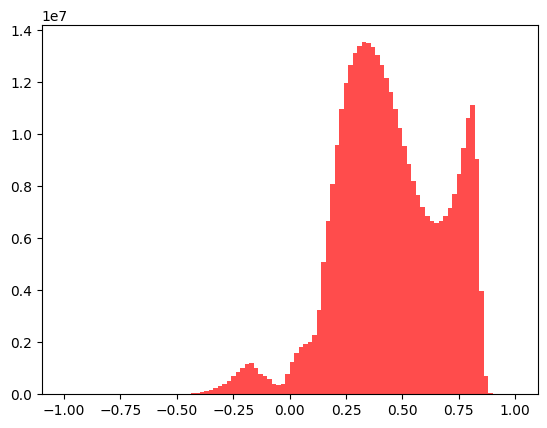

In [ ]:
# get histogram of ndvi image values

import matplotlib.pyplot as plt

plt.hist(ndvi[ndvi != -1.1].ravel(), bins=100, color="red", alpha=0.7)

In [ ]:
def categorize_np_array(array):

    cat_array = np.zeros(array.shape)
    cat_array[array < 1] = 5
    cat_array[array < 0.8] = 4
    cat_array[array < 0.6] = 3
    cat_array[array < 0.4] = 2
    cat_array[array < 0.2] = 1

    return cat_array

In [ ]:
cat_ndvi = categorize_np_array(ndvi)

In [ ]:
cat_ndvi

array([[2., 2., 2., ..., 4., 4., 4.],
       [2., 2., 2., ..., 4., 4., 4.],
       [2., 2., 2., ..., 4., 4., 4.],
       ...,
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.],
       [1., 1., 1., ..., 2., 2., 2.]])

In [ ]:
ndvi_image_cat = leafmap.array_to_image(cat_ndvi, source=mosaic_bands["nir"])

In [ ]:
m = leafmap.Map()
m.add_raster(
    ndvi_image_cat, layer_name="NDVI", vmin=1, vmax=5, cmap="Set1", draw_control=False
)
m.add_colormap(
    "Set1",
    label="ndvi",
    width=8.0,
    height=0.4,
    orientation="horizontal",
    vmin=1,
    vmax=5,
)

m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [ ]:
# plot using

## k-means


In [ ]:
def resample_raster(in_file, out_file, upscale_factor=0.5):
    with rio.open(in_file) as dataset:

        # resample data to target shape
        data = dataset.read(
            out_shape=(
                dataset.count,
                int(dataset.height * upscale_factor),
                int(dataset.width * upscale_factor),
            ),
            resampling=rio.enums.Resampling.bilinear,
        )

        # scale image transform
        transform = dataset.transform * dataset.transform.scale(
            (dataset.width / data.shape[-1]), (dataset.height / data.shape[-2])
        )

        # update metadata
        meta = dataset.meta.copy()
        meta.update(
            {
                "height": data.shape[1],
                "width": data.shape[2],
                "transform": transform,
            }
        )

        with rio.open(out_file, "w", **meta) as dst:
            dst.write(data)

In [ ]:
for band in mosaic_bands_all.keys():
    print(band, rio.open(mosaic_bands_all[band]).read(1).shape)

In [ ]:
# set resampling ratio for each band- note that some are higher resolution than others and need a different scaling factor
bands_to_resample = {
    "red": 0.25,
    "blue": 0.25,
    "green": 0.25,
    "nir": 0.25,
    "nir08": 0.5,
    "rededge1": 0.5,
    "rededge2": 0.5,
    "rededge3": 0.5,
    "scl": 0.5,
    "swir16": 0.5,
    "swir22": 0.5,
}

In [ ]:
# resample the bands so they are all smaller and uniform
for band, ratio in bands_to_resample.items():
    resample_raster(
        mosaic_bands_all[band], f"../Data/stac/dallas/upscaled_{band}.tif", ratio
    )
    mosaic_bands_all[f"{band}"] = f"../Data/stac/dallas/{band}_scaled_.tif"

NameError: name 'bands_to_resample' is not defined

In [ ]:
mosaic_bands_all

{'red': '../Data/stac/dallas/upscaled_red.tif',
 'blue': '../Data/stac/dallas/upscaled_blue.tif',
 'green': '../Data/stac/dallas/upscaled_green.tif',
 'nir': '../Data/stac/dallas/upscaled_nir.tif',
 'coastal': '../Data/stac/dallas/mosaic_coastal_.tif',
 'nir08': '../Data/stac/dallas/mosaic_nir08_.tif',
 'nir09': '../Data/stac/dallas/mosaic_nir09_.tif',
 'rededge1': '../Data/stac/dallas/mosaic_rededge1_.tif',
 'rededge2': '../Data/stac/dallas/mosaic_rededge2_.tif',
 'rededge3': '../Data/stac/dallas/mosaic_rededge3_.tif',
 'scl': '../Data/stac/dallas/mosaic_scl_.tif',
 'swir16': '../Data/stac/dallas/mosaic_swir16_.tif',
 'swir22': '../Data/stac/dallas/mosaic_swir22_.tif'}

In [ ]:
# create a new dict with all bands excpct coastal
mosaic_bands_all_no_coastal = {
    k: v for k, v in mosaic_bands_all.items() if k not in ["coastal", "nir09"]
}

In [ ]:
for band in mosaic_bands_all_no_coastal.keys():
    print(band, rio.open(mosaic_bands_all_no_coastal[band]).read(1).shape)

mosaic_bands_all_no_coastal = np.stack(
    [
        rio.open(mosaic_bands_all_no_coastal[band]).read(1)
        for band in mosaic_bands_all_no_coastal.keys()
    ],
    axis=-1,
)

red (10491, 10488)
blue (10491, 10488)
green (10491, 10488)
nir (10491, 10488)
nir08 (10491, 10488)
rededge1 (10491, 10488)
rededge2 (10491, 10488)
rededge3 (10491, 10488)
scl (10491, 10488)
swir16 (10491, 10488)
swir22 (10491, 10488)


In [ ]:
from rasterio.plot import reshape_as_raster, reshape_as_image

In [ ]:
reshaped_img = reshape_as_image(mosaic_bands_all_no_coastal)

In [ ]:
def color_stretch(image, index):
    colors = image[:, :, index].astype(np.float64)
    for b in range(colors.shape[2]):
        colors[:, :, b] = rasterio.plot.adjust_band(colors[:, :, b])
    return colors


# find the highest pixel value in the prediction image
n = int(np.max(class_prediction))

# next setup a colormap for our map
colors = dict(
    (
        (0, (48, 156, 214, 255)),  # Blue - Water
        (1, (139, 69, 19, 255)),  # Brown - WetSand
        (2, (96, 19, 134, 255)),  # Purple - Emergent Wetland
        (3, (244, 164, 96, 255)),  # Tan - Sand
        (4, (206, 224, 196, 255)),  # Lime - Herbaceous
        (5, (34, 139, 34, 255)),  # Forest Green - Forest
    )
)

# Put 0 - 255 as float 0 - 1
for k in colors:
    v = colors[k]
    _v = [_v / 255.0 for _v in v]
    colors[k] = _v

index_colors = [
    colors[key] if key in colors else (255, 255, 255, 0) for key in range(0, n + 1)
]

cmap = plt.matplotlib.colors.ListedColormap(index_colors, "Classification", n + 1)

NameError: name 'class_prediction' is not defined

In [ ]:
from sklearn.cluster import KMeans

bands, rows, cols = mosaic_bands_all_no_coastal.shape

k = 10  # num of clusters

kmeans_predictions = KMeans(n_clusters=k, random_state=0).fit(
    reshaped_img.reshape(-1, 4)
)

kmeans_predictions_2d = kmeans_predictions.labels_.reshape(rows, cols)

# Now show the classmap next to the image
# fig, axs = plt.subplots(1,2,figsize=(15,8))

# img_stretched = color_stretch(reshaped_img, [3, 2, 1])
# axs[0].imshow(img_stretched)

# axs[1].imshow(kmeans_predictions_2d)

: 

In [ ]:
stop

## landsat


In [ ]:
url = "https://earth-search.aws.element84.com/v1/"
collection = "landsat-c2-l2"
time_range = "2023-08-01/2023-08-31"

In [ ]:
# bbox for dallas metro
bbox = [
    -97.06213756027009,
    32.97324551867027,
    -96.46807822577594,
    33.3578329610085,
]

In [ ]:
search = leafmap.stac_search(
    url=url,
    max_items=10,
    collections=[collection],
    bbox=bbox,
    datetime=time_range,
    query={"eo:cloud_cover": {"lt": 20}},
    sortby=[{"field": "properties.eo:cloud_cover", "direction": "asc"}],
    get_links=True,
)
search

In [ ]:
m = leafmap.Map()

# for layer in search[0]:
m.add_stac_layer(search[0], bands=["nir08", "red", "green"], name=layer.split("/")[-1])
m

## classify using samples


In [ ]:
import geopandas as gpd

In [ ]:
# use a random forest classifier to classify the image using samples from the geojson dataset
samples = gpd.read_file("./data.geojson")

samples

type                                           geometry
0         None                                               None
1         golf  POLYGON ((-96.90516 33.04001, -96.90676 33.038...
2      wetland  POLYGON ((-96.88824 33.05067, -96.88980 33.049...
3   industrial  POLYGON ((-96.91752 33.05633, -96.91691 33.055...
4   deep water  POLYGON ((-96.93657 33.07736, -96.93907 33.074...
..         ...                                                ...
74       urban  POLYGON ((-96.66727 32.79627, -96.66489 32.795...
75       urban  POLYGON ((-96.66537 32.79916, -96.66544 32.797...
76       urban  POLYGON ((-96.67495 32.79557, -96.67499 32.794...
77       urban  POLYGON ((-96.67810 32.79755, -96.67817 32.796...
78     roadway  POLYGON ((-96.68573 32.79747, -96.68570 32.797...

[79 rows x 2 columns]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=500, oob_score=True)

# create matricies for the classifier by loading in the mosaic bands and creating a multiband array
mosaic_data = np.stack(
    [rio.open(mosaic_bands[band]).read(1) for band in ["nir", "red", "green", "blue"]],
    axis=-1,
)

# reshape the data to be 2d
X = mosaic_data.reshape(-1, 4)

In [ ]:
X

array([[2386, 1218,  908,  648],
       [2348, 1266,  922,  672],
       [2344, 1280,  992,  714],
       ...,
       [3168, 1666, 1274,  952],
       [3078, 1712, 1270,  916],
       [3065, 1582, 1208,  924]], dtype=uint16)

In [ ]:
samples_diss = samples.dissolve(by="type").reset_index()

In [ ]:
samples["class"] = samples["type"].astype("category").cat.codes

In [ ]:
samples["class"].unique()

array([-1,  3, 11,  4,  1,  7,  6,  0,  2,  8,  9, 10,  5], dtype=int8)

In [ ]:
ref_raster = rio.open(mosaic_bands["nir"])

In [ ]:
samples.geometry.dropna(inplace=True)

In [ ]:
ref_raster.transform

Affine(10.0, 0.0, 600000.0,
       0.0, -10.0, 3800040.0)

In [ ]:
ref_raster.crs

CRS.from_epsg(32614)

In [ ]:
samples.to_crs(ref_raster.crs, inplace=True)

In [ ]:
samples.dropna(inplace=True)

In [ ]:
samples["class"].unique()

array([ 3, 11,  4,  1,  7,  6,  0,  2,  8,  9, 10,  5], dtype=int8)

In [ ]:
# print each value pair in geom_value
for geom, value in zip(samples.geometry, samples["class"]):
    print(type(geom), value)

<class 'shapely.geometry.polygon.Polygon'> 3
<class 'shapely.geometry.polygon.Polygon'> 11
<class 'shapely.geometry.polygon.Polygon'> 4
<class 'shapely.geometry.polygon.Polygon'> 1
<class 'shapely.geometry.polygon.Polygon'> 7
<class 'shapely.geometry.polygon.Polygon'> 6
<class 'shapely.geometry.polygon.Polygon'> 0
<class 'shapely.geometry.polygon.Polygon'> 0
<class 'shapely.geometry.polygon.Polygon'> 2
<class 'shapely.geometry.polygon.Polygon'> 11
<class 'shapely.geometry.polygon.Polygon'> 2
<class 'shapely.geometry.polygon.Polygon'> 6
<class 'shapely.geometry.polygon.Polygon'> 6
<class 'shapely.geometry.polygon.Polygon'> 8
<class 'shapely.geometry.polygon.Polygon'> 8
<class 'shapely.geometry.polygon.Polygon'> 8
<class 'shapely.geometry.polygon.Polygon'> 8
<class 'shapely.geometry.polygon.Polygon'> 8
<class 'shapely.geometry.polygon.Polygon'> 8
<class 'shapely.geometry.polygon.Polygon'> 8
<class 'shapely.geometry.polygon.Polygon'> 8
<class 'shapely.geometry.polygon.Polygon'> 9
<class '

In [ ]:
samples.crs

<Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
geom_value = (
    (geom, value) for geom, value in zip(samples["geometry"], samples["class"])
)

# geom = [g for g, v in geom_value if g is not None]

# Rasterize vector using the shape and transform of the raster
rasterized = rio.features.rasterize(
    geom_value,
    out_shape=ref_raster.shape,
    transform=ref_raster.transform,
    all_touched=True,
    fill=-2,  # background value
    # default_value=1,
    merge_alg=rio.enums.MergeAlg.replace,
    dtype=np.int16,
)

# geom_value,
# out_shape = raster.shape,
# transform = raster.transform,
# all_touched = True,
# fill = -5,   # background value
# merge_alg = MergeAlg.replace,
# dtype = int16)

In [ ]:
# get uniqe values in the rasterized array
np.unique(rasterized)

array([-2,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int16)

In [ ]:
samples["class"].unique()

array([ 3, 11,  4,  1,  7,  6,  0,  2,  8,  9, 10,  5], dtype=int8)

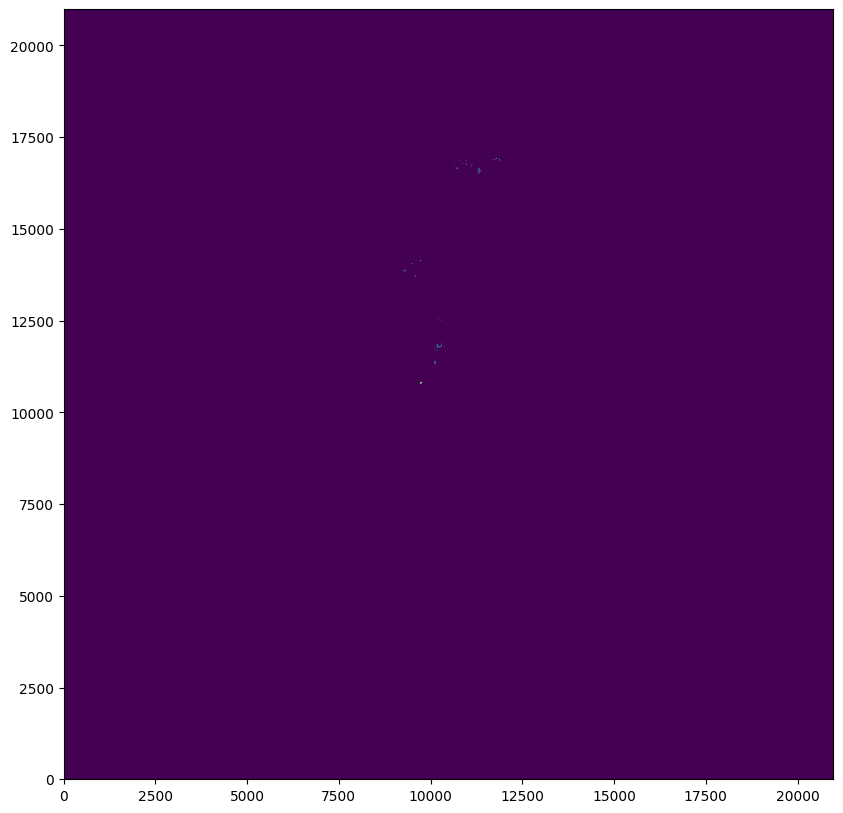

In [ ]:
fig, ax = plt.subplots(1, figsize=(10, 10))
rio.plot.show(
    rasterized,
    ax=ax,
)
plt.gca().invert_yaxis()

In [ ]:
stop

NameError: name 'stop' is not defined

In [ ]:
# now make y the rasterized array
y = rasterized.reshape(-1)

In [ ]:
# fit the model
rf.fit(X, y)

In [ ]:
print("Our OOB prediction of accuracy is: {oob}%".format(oob=rf.oob_score_ * 100))

In [ ]:
bands = ["nir", "red", "green", "blue"]


for b, imp in zip(bands, rf.feature_importances_):
    print("Band {b} importance: {imp}".format(b=b, imp=imp))